# 1. STEM Job Market in the US

## a. Data & Packages Import

In [299]:
import numpy as np
import pandas as pd

In [300]:
df = pd.read_csv("stem_occupation.csv")

df

,Unnamed: 0,Occupation category,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Median annual wage, dollars, 2023[1]"
0,1,"Total, all occupations",167849.8,174589.0,6739.2,4.0,48060
1,2,STEM occupations[2],10712.4,11822.8,1110.4,10.4,101650
2,3,Non-STEM occupations,157137.5,162766.2,5628.8,3.6,46680


## b. Background

In [301]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data
categories = ['Total', 'STEM', 'Non-STEM']
percentages = [4.0, 10.4, 3.6]

# Create the figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.7, 0.3],
    specs=[[{"type": "bar"}, {"type": "table"}]],
    subplot_titles=("Employment Change by Category (2023-2033)", "Emerging STEM Careers")
)

# Add bar chart
fig.add_trace(
    go.Bar(
        x=categories,
        y=percentages,
        text=[f'{p}%' for p in percentages],
        textposition='outside',
        marker_color=['#1f77b4', '#ff7f0e', '#1f77b4']
    ),
    row=1, col=1
)

# Customize the chart
fig.update_layout(
    title=dict(
        text='STEM Employment Growth and Emerging Careers',
        x=0.5,  
        font=dict(color='darkblue', size=30),
    ),
    xaxis_title='Occupation Category',
    yaxis_title='Employment Change (%)',
    height=600,
    showlegend=False,
    annotations=[
        dict(
            x=0.35, y=0.95,
            xref="paper", yref="paper",
            text="STEM growth is significantly higher than average",
            showarrow=True,
            arrowhead=2,
            ax=0, ay=-40
        ),
        # New annotation for STEM jobs created
        dict(
            x=0.8, y=0.7,
            xref="paper", yref="paper",
            text="<b>New STEM Jobs Created:</b><br>11,110,400",
            showarrow=False,
            bordercolor="#ff7f0e",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ffffff",
            opacity=0.8,
            align="center"
        )
    ]
)

# Add a horizontal line for the overall average
fig.add_shape(
    type="line",
    x0=-0.5, y0=4, x1=2.5, y1=4,
    line=dict(color="red", width=2, dash="dash"),
    row=1, col=1
)
fig.add_annotation(
    x=2.5, y=4,
    text="Overall Average (4.0%)",
    showarrow=False,
    yshift=10,
    font=dict(color="red"),
    row=1, col=1
)

# Add source information
fig.add_annotation(
    x=0.5, y=-0.15,
    xref="paper", yref="paper",
    text="Source: Bureau of Labor Statistics",
    showarrow=False,
    font=dict(size=10)
)

fig.show()

In [302]:
import plotly.graph_objects as go
import pandas as pd

gdp = pd.read_csv("Data/gdp.csv")

# Data for pie chart
total_gdp = 25440000000000
direct_stem = 7659763581061
total_impact = 13455680288718
other = total_gdp - total_impact

# Calculate percentages for pie chart
total_impact_pct = (total_impact / total_gdp) * 100
other_pct = (other / total_gdp) * 100

# Data for tax revenue
federal_tax_revenue = 2393085107704
state_local_tax_revenue = 1227299092354

# Create the figure
fig = go.Figure()

# Add pie chart
fig.add_trace(go.Pie(
    labels=['Total Impact', 'Other'],
    values=[total_impact_pct, other_pct],
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.3,
    pull=[0.1, 0],  # Explode the 'Total Impact' slice
))

# Update layout
fig.update_layout(
    title_text="GDP Composition and Tax Revenue",
    annotations=[
        dict(text=f'Total GDP<br>$25.44T', x=0.5, y=0.5, font_size=12, showarrow=False),
        
        # Federal Tax Revenue annotation
        dict(
            x=1.1, y=0.7,
            xref="paper", yref="paper",
            text=f"<b>Federal Tax Revenue<br>${federal_tax_revenue/1e9:.2f}B</b>",
            showarrow=False,
            bordercolor="#FFA500",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ffffff",
            opacity=0.8,
            align="center",
        ),
        
        # State & Local Tax Revenue annotation
        dict(
            x=1.1, y=0.3,
            xref="paper", yref="paper",
            text=f"<b>State & Local Tax Revenue<br>${state_local_tax_revenue/1e9:.2f}B</b>",
            showarrow=False,
            bordercolor="#FFA500",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ffffff",
            opacity=0.8,
            align="center",
        )
    ],
    legend=dict(
        x=0.01,  # Move legend to the upper left corner
        y=0.99,
        xanchor="left",
        yanchor="top",
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="White",
        bordercolor="Black",
        borderwidth=2
    ),
    margin=dict(r=200)  # Increase right margin to accommodate annotations
)

# Remove axes
fig.update_xaxes(showticklabels=False, showgrid=False, zeroline=False)
fig.update_yaxes(showticklabels=False, showgrid=False, zeroline=False)

# Show the figure
fig.show()

## c. By State

In [303]:
import pandas as pd

df = pd.read_csv("Data/stem_stat_by_state.csv")

df.head()

,Unnamed: 0,area_name,h_mean,avg_wagegap(hr)_STEM_vs_state,a_mean,avg_wagegap(yr)_STEM_vs_state,tot_emp_STEM,STEM_percentage,year
0,0,Alabama,42.81,21.222078,89040,44144.188292,109640,5.553726,2019
1,1,Alaska,43.81,15.323030,91120,31862.917153,20280,6.395661,2019
2,2,Arizona,42.05,17.585005,87460,36572.323663,186700,6.512465,2019
3,3,Arkansas,36.49,15.977500,75890,33232.047691,48470,3.981370,2019
4,4,California,54.50,25.063509,113360,52133.207710,1312170,7.548843,2019


In [304]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Slicing
df_2023 = df[df['year'] == 2023]

# Sort the DataFrame by STEM employment in descending order and get the top 10
top_10_states = df_2023.sort_values('tot_emp_STEM', ascending=False).head(10)

# Calculate STEM percentage (assuming you have total employment data)
top_10_states['STEM_percentage'] = top_10_states['STEM_percentage']

# Create a custom color scale
colors = px.colors.sequential.Plasma_r[:len(top_10_states)]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart
fig.add_trace(
    go.Bar(
        x=top_10_states['area_name'],
        y=top_10_states['tot_emp_STEM'],
        marker_color=colors,
        text=top_10_states['tot_emp_STEM'].apply(lambda x: f'{x:,}'),
        textposition='auto',
        name='STEM Employees',
        hovertemplate='%{x}<br>STEM Employees: %{text}<extra></extra>'
    ),
    secondary_y=False,
)

# Add dashed line for STEM percentage
fig.add_trace(
    go.Scatter(
        x=top_10_states['area_name'],
        y=top_10_states['STEM_percentage'],
        mode='lines+markers+text',
        name='STEM Percentage',
        line=dict(color='red', dash='dash'),
        marker=dict(symbol='diamond', size=8, color='red'),
        text=top_10_states['STEM_percentage'].apply(lambda x: f'{x:.1f}%'),
        textposition='top center',
        hovertemplate='%{x}<br>STEM Percentage: %{y:.1f}%<extra></extra>'
    ),
    secondary_y=True,
)

# Customize the layout
fig.update_layout(
    title={
        'text': 'Top 10 States: STEM Employment and % of workforces (2023)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='#1f77b4')
    },
    xaxis_title='State',
    yaxis_title='Number of STEM Employees',
    xaxis={'tickangle': 0},
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial", size=14, color="#505050"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=120, b=50),
)

# Update yaxis properties
fig.update_yaxes(title_text="Number of STEM Employees", secondary_y=False)
fig.update_yaxes(title_text="STEM Percentage", secondary_y=True)

# Add a subtle grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.2)', secondary_y=False)

# Show the figure
fig.show()

In [305]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Slicing
df_2023 = df[df['year'] == 2023]

# Sort the DataFrame by STEM employment in ascending order and get the bottom 10
bottom_10_states = df_2023.sort_values('tot_emp_STEM', ascending=True).head(10)

# Calculate STEM percentage
bottom_10_states['STEM_percentage'] = bottom_10_states['STEM_percentage']

# Create a custom color scale
colors = px.colors.sequential.Viridis[:len(bottom_10_states)]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart
fig.add_trace(
    go.Bar(
        x=bottom_10_states['area_name'],
        y=bottom_10_states['tot_emp_STEM'],
        marker_color=colors,
        text=bottom_10_states['tot_emp_STEM'].apply(lambda x: f'{x:,}'),
        textposition='auto',
        name='STEM Employees',
        hovertemplate='%{x}<br>STEM Employees: %{text}<extra></extra>'
    ),
    secondary_y=False,
)

# Add dashed line for STEM percentage
fig.add_trace(
    go.Scatter(
        x=bottom_10_states['area_name'],
        y=bottom_10_states['STEM_percentage'],
        mode='lines+markers+text',
        name='STEM Percentage',
        line=dict(color='red', dash='dash'),
        marker=dict(symbol='diamond', size=8, color='red'),
        text=bottom_10_states['STEM_percentage'].apply(lambda x: f'{x:.1f}%'),
        textposition='top center',
        hovertemplate='%{x}<br>STEM Percentage: %{y:.1f}%<extra></extra>'
    ),
    secondary_y=True,
)

# Customize the layout
fig.update_layout(
    title={
        'text': 'Bottom 10 States: STEM Employment and Percentage (2023)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='#1f77b4')
    },
    xaxis_title='State',
    yaxis_title='Number of STEM Employees',
    xaxis={'tickangle': 0},
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial", size=14, color="#505050"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=120, b=50),
)

# Update yaxis properties
fig.update_yaxes(title_text="Number of STEM Employees", secondary_y=False)
fig.update_yaxes(title_text="STEM Percentage", secondary_y=True)

# Add a subtle grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.2)', secondary_y=False)

In [306]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Slicing
df_2023 = df[df['year'] == 2023]

# Sort the DataFrame by a_mean in descending order and get the top 10
top_10_states = df_2023.sort_values('a_mean', ascending=False).head(10)

# Create a custom color scale
colors = px.colors.sequential.Viridis_r[:len(top_10_states)]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for a_mean
fig.add_trace(
    go.Bar(
        x=top_10_states['area_name'],
        y=top_10_states['a_mean'],
        marker_color=colors,
        text=top_10_states['a_mean'].apply(lambda x: f'${x:,.0f}'),
        textposition='auto',
        name='Average Annual STEM Wage',
        hovertemplate='%{x}<br>Average Annual Wage: %{text}<extra></extra>'
    ),
    secondary_y=False,
)


# Customize the layout
fig.update_layout(
    title={
        'text': 'Top 10 States: Average Annual STEM Wage and STEM Percentage (2023)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='#1f77b4')
    },
    xaxis_title='State',
    yaxis_title='Average Annual STEM Wage ($)',
    xaxis={'tickangle': 0},
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial", size=14, color="#505050"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=120, b=50),
)

# Update yaxis properties
fig.update_yaxes(title_text="Average Annual STEM Wage ($)", secondary_y=False)

# Add a subtle grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.2)', secondary_y=False)


# Format y-axis as currency
fig.update_layout(yaxis=dict(tickprefix="$", tickformat=",.0f"))

# Show the figure
fig.show()

In [307]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Slicing
df_2023 = df[df['year'] == 2023]

# Sort the DataFrame by a_mean in ascending order and get the bottom 10
bottom_10_states = df_2023.sort_values('a_mean', ascending=True).head(10)


# Create a custom color scale
colors = px.colors.sequential.Viridis[:len(bottom_10_states)]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for a_mean
fig.add_trace(
    go.Bar(
        x=bottom_10_states['area_name'],
        y=bottom_10_states['a_mean'],
        marker_color=colors,
        text=bottom_10_states['a_mean'].apply(lambda x: f'${x:,.0f}'),
        textposition='auto',
        name='Average Annual STEM Wage',
        hovertemplate='%{x}<br>Average Annual Wage: %{text}<extra></extra>'
    ),
    secondary_y=False,
)


# Customize the layout
fig.update_layout(
    title={
        'text': 'Bottom 10 States: Average Annual STEM Wage and STEM Percentage (2023)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='#1f77b4')
    },
    xaxis_title='State',
    yaxis_title='Average Annual STEM Wage ($)',
    xaxis={'tickangle': 0},
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial", size=14, color="#505050"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=120, b=50),
)

# Update yaxis properties
fig.update_yaxes(title_text="Average Annual STEM Wage ($)", secondary_y=False)

# Add a subtle grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.2)', secondary_y=False)


# Format y-axis as currency
fig.update_layout(yaxis=dict(tickprefix="$", tickformat=",.0f"))

# Show the figure
fig.show()

In [308]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

livingcst_df = pd.read_csv("Data/livingcost.csv")
df_2023 = df[df['year'] == 2023]

df_2023 = pd.merge(df_2023, livingcst_df, on="area_name", how='inner')

df_2023.drop(columns=['Unnamed: 0_y','Unnamed: 0_x'], inplace=True)

df_2023['Profit'] = df_2023['a_mean'] - df_2023['livingCost']

# Sort the DataFrame by Profit in descending order and get the top 10
top_10_profit_states = df_2023.sort_values('Profit', ascending=False).head(10)

# Create a custom color scale
colors = px.colors.sequential.Viridis_r[:len(top_10_profit_states)]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for Profit
fig.add_trace(
    go.Bar(
        x=top_10_profit_states['area_name'],
        y=top_10_profit_states['Profit'],
        marker_color=colors,
        text=top_10_profit_states['Profit'].apply(lambda x: f'${x:,.0f}'),
        textposition='auto',
        name='STEM Wage - Living Cost',
        hovertemplate='%{x}<br>Profit: %{text}<extra></extra>'
    ),
    secondary_y=False,
)

# Customize the layout
fig.update_layout(
    title={
        'text': 'Top 10 States: STEM Wage - Avg Living Cost (2023)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='#1f77b4')
    },
    xaxis_title='State',
    yaxis_title='STEM Wage - Living Cost ($)',
    xaxis={'tickangle': 0},
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial", size=14, color="#505050"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=120, b=50),
)

# Update yaxis properties
fig.update_yaxes(title_text="STEM Wage - Living Cost ($)", secondary_y=False)

# Add a subtle grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.2)', secondary_y=False)

# Format y-axis as currency
fig.update_layout(yaxis=dict(tickprefix="$", tickformat=",.0f"))

# Show the figure
fig.show()

In [309]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sort the DataFrame by Profit in ascending order and get the bottom 10
bottom_10_profit_states = df_2023.sort_values('Profit', ascending=True).head(10)

# Create a custom color scale
colors = px.colors.sequential.Viridis[:len(bottom_10_profit_states)]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for Profit
fig.add_trace(
    go.Bar(
        x=bottom_10_profit_states['area_name'],
        y=bottom_10_profit_states['Profit'],
        marker_color=colors,
        text=bottom_10_profit_states['Profit'].apply(lambda x: f'${x:,.0f}'),
        textposition='auto',
        name='STEM Wage - Living Cost',
        hovertemplate='%{x}<br>Profit: %{text}<extra></extra>'
    ),
    secondary_y=False,
)

# Customize the layout
fig.update_layout(
    title={
        'text': 'Bottom 10 States: STEM Wage Profit (2023)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='#1f77b4')
    },
    xaxis_title='State',
    yaxis_title='STEM Wage - Living Cost ($)',
    xaxis={'tickangle': 0},
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial", size=14, color="#505050"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=120, b=50),
)

# Update yaxis properties
fig.update_yaxes(title_text="STEM Wage - Living Cost ($)", secondary_y=False)

# Add a subtle grid
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(200,200,200,0.2)', secondary_y=False)


# Format y-axis as currency
fig.update_layout(yaxis=dict(tickprefix="$", tickformat=",.0f"))

# Show the figure
fig.show()

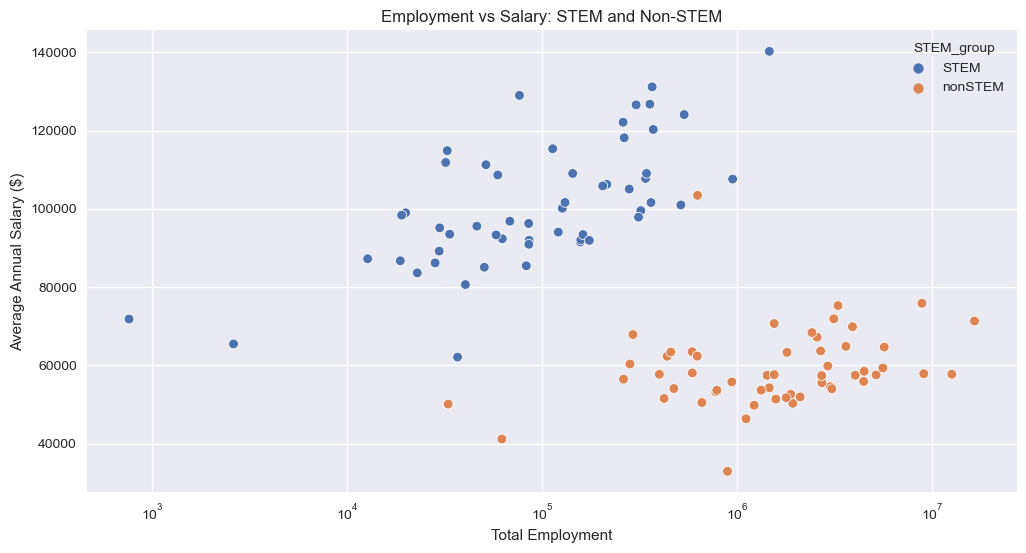

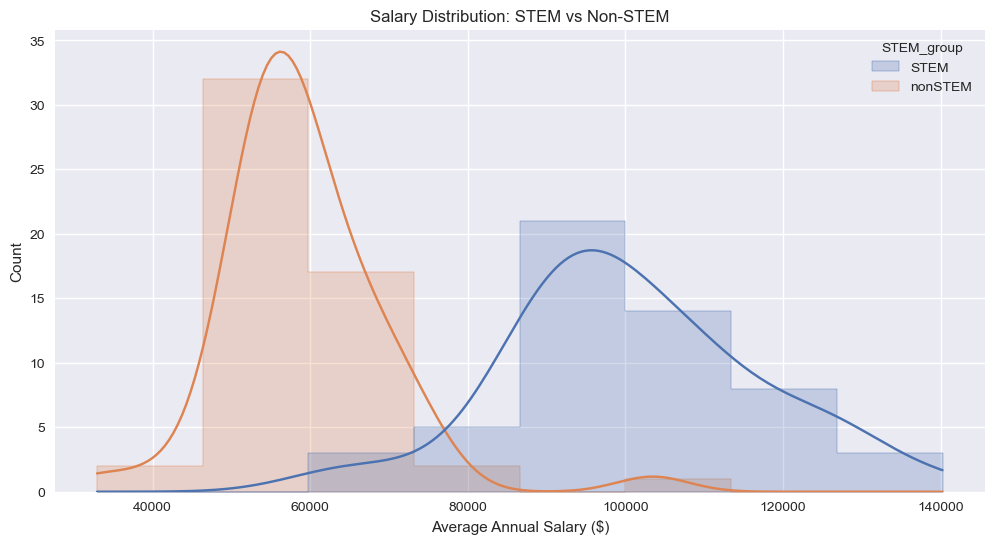

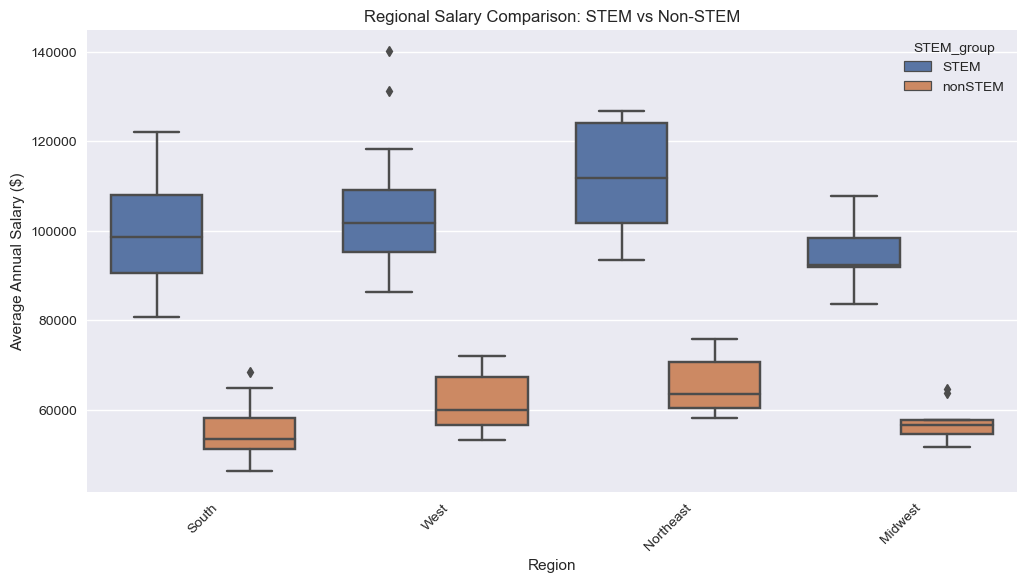

In [310]:

## Employment vs Salary Analysis

plt.figure(figsize=(12, 6))
sns.scatterplot(x='tot_emp', y='a_mean', hue='STEM_group', data=data)
plt.title('Employment vs Salary: STEM and Non-STEM')
plt.xlabel('Total Employment')
plt.ylabel('Average Annual Salary ($)')
plt.xscale('log')
plt.show()

## Salary Distribution

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='a_mean', hue='STEM_group', kde=True, element='step')
plt.title('Salary Distribution: STEM vs Non-STEM')
plt.xlabel('Average Annual Salary ($)')
plt.show()

## Regional Analysis

# Define regions (you may need to adjust these)
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

data['region'] = data['area_name'].apply(lambda x: 'Northeast' if x in northeast else ('Midwest' if x in midwest else ('South' if x in south else ('West' if x in west else 'Other'))))

plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='a_mean', hue='STEM_group', data=data[data['region'] != 'Other'])
plt.title('Regional Salary Comparison: STEM vs Non-STEM')
plt.xlabel('Region')
plt.ylabel('Average Annual Salary ($)')
plt.xticks(rotation=45)
plt.show()

In [311]:
import plotly.graph_objects as go
import pandas as pd

# and a GeoJSON file for the states called 'us_states'

# Create the base choropleth map
fig = go.Figure()

# Add traces for each dataset (STEM and non-STEM)
for group in ['STEM', 'nonSTEM']:
    df_group = data[data['STEM_group'] == group]
    
    fig.add_trace(go.Choropleth(
        locations=df_group['area_name'],
        z=df_group['a_mean'],
        locationmode='USA-states',
        colorscale='Viridis',
        colorbar_title="Average Annual Salary ($)",
        name=group,
        visible=(group == 'STEM')  # Only STEM is visible initially
    ))

    fig.add_trace(go.Choropleth(
        locations=df_group['area_name'],
        z=df_group['tot_emp'],
        locationmode='USA-states',
        colorscale='YlOrRd',
        colorbar_title="Total Employment",
        name=group,
        visible=False  # Employment data is hidden initially
    ))

# Update the layout
fig.update_layout(
    title_text='STEM vs Non-STEM: Salary and Employment by State',
    geo_scope='usa',
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.15,
            showactive=True,
            buttons=[
                dict(label="STEM",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "STEM: Average Annual Salary by State"}]),
                dict(label="Non-STEM",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Non-STEM: Average Annual Salary by State"}]),
                dict(label="STEM Employment",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "STEM: Total Employment by State"}]),
                dict(label="Non-STEM Employment",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Non-STEM: Total Employment by State"}]),
            ],
        )
    ]
)

fig.show()

In [312]:
raw_df = pd.read_excel('Data/stem_2023.xlsx', sheet_name="State")
raw_df = raw_df[['area_name', 'STEM_group', 'tot_emp', 'h_mean', 'a_mean']]

stem_df = raw_df[raw_df['STEM_group']=='STEM']
non_stem_df = raw_df[raw_df['STEM_group']=='nonSTEM']

merge_df = pd.merge(stem_df, non_stem_df,on='area_name')

merge_df['wage_gap_stem_vs_non'] = merge_df['a_mean_x']-merge_df['a_mean_y']

merge_df = merge_df[['area_name','wage_gap_stem_vs_non']]


merge_df = pd.merge(merge_df, df_2023, on='area_name')

merge_df = merge_df[['area_name','wage_gap_stem_vs_non','a_mean']]

merge_df['pct_wage_gap'] = merge_df['wage_gap_stem_vs_non']/merge_df['a_mean'] * 100

merge_df.head()

,area_name,wage_gap_stem_vs_non,a_mean,pct_wage_gap
0,Alabama,49830,100150,49.755367
1,Alaska,31100,98990,31.417315
2,Arizona,46400,106260,43.666478
3,Arkansas,35240,85090,41.414972
4,California,68870,140220,49.115675


In [313]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sort the DataFrame by wage_gap_stem_vs_non in descending order and get the top 10
top_10_wage_gap = merge_df.sort_values('wage_gap_stem_vs_non', ascending=False).head(10)

# Create a custom color scale
colors = px.colors.sequential.Viridis_r[:len(top_10_wage_gap)]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for wage gap
fig.add_trace(
    go.Bar(
        x=top_10_wage_gap['area_name'],
        y=top_10_wage_gap['wage_gap_stem_vs_non'],
        marker_color=colors,
        text=top_10_wage_gap['wage_gap_stem_vs_non'].apply(lambda x: f'${x:,.0f}'),
        textposition='auto',
        name='STEM Wage Gap',
        hovertemplate='%{x}<br>STEM Wage Gap: %{text}<extra></extra>'
    ),
    secondary_y=False,
)

# Add dashed line for percentage wage gap
fig.add_trace(
    go.Scatter(
        x=top_10_wage_gap['area_name'],
        y=top_10_wage_gap['pct_wage_gap'],
        mode='lines+markers+text',
        name='Percentage Wage Gap',
        line=dict(color='red', dash='dash'),
        marker=dict(symbol='diamond', size=8, color='red'),
        text=top_10_wage_gap['pct_wage_gap'].apply(lambda x: f'{x:.1f}%'),
        textposition='top center',
        hovertemplate='%{x}<br>Percentage Wage Gap: %{text}<extra></extra>'
    ),
    secondary_y=True,
)

# Customize the layout
fig.update_layout(
    title={
        'text': 'Top 10 States: STEM Wage Gap and Percentage (2023)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='#1f77b4')
    },
    xaxis_title='State',
    yaxis_title='STEM Wage Gap ($)',
    xaxis={'tickangle': 0},
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial", size=14, color="#505050"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=120, b=50),
)

# Update yaxis properties
fig.update_yaxes(title_text="STEM Wage Gap ($)", secondary_y=False)
fig.update_yaxes(title_text="Percentage Wage Gap (%)", secondary_y=True)

# Format y-axis as currency
fig.update_layout(yaxis=dict(tickprefix="$", tickformat=",.0f"))
fig.update_layout(yaxis2=dict(ticksuffix="%"))

# Show the figure
fig.show()

In [314]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sort the DataFrame by wage_gap_stem_vs_non in ascending order and get the bottom 10
bottom_10_wage_gap = merge_df.sort_values('wage_gap_stem_vs_non', ascending=True).head(10)

# Create a custom color scale
colors = px.colors.sequential.Viridis[:len(bottom_10_wage_gap)]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for wage gap
fig.add_trace(
    go.Bar(
        x=bottom_10_wage_gap['area_name'],
        y=bottom_10_wage_gap['wage_gap_stem_vs_non'],
        marker_color=colors,
        text=bottom_10_wage_gap['wage_gap_stem_vs_non'].apply(lambda x: f'${x:,.0f}'),
        textposition='auto',
        name='STEM Wage Gap',
        hovertemplate='%{x}<br>STEM Wage Gap: %{text}<extra></extra>'
    ),
    secondary_y=False,
)

# Add dashed line for percentage wage gap
fig.add_trace(
    go.Scatter(
        x=bottom_10_wage_gap['area_name'],
        y=bottom_10_wage_gap['pct_wage_gap'],
        mode='lines+markers+text',
        name='Percentage Wage Gap',
        line=dict(color='red', dash='dash'),
        marker=dict(symbol='diamond', size=8, color='red'),
        text=bottom_10_wage_gap['pct_wage_gap'].apply(lambda x: f'{x:.1f}%'),
        textposition='top center',
        hovertemplate='%{x}<br>Percentage Wage Gap: %{text}<extra></extra>'
    ),
    secondary_y=True,
)

# Customize the layout
fig.update_layout(
    title={
        'text': 'Bottom 10 States: STEM Wage Gap and Percentage (2023)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='#1f77b4')
    },
    xaxis_title='State',
    yaxis_title='STEM Wage Gap ($)',
    xaxis={'tickangle': 0},
    plot_bgcolor='rgba(240,240,240,0.95)',
    paper_bgcolor='rgba(240,240,240,0.95)',
    font=dict(family="Arial", size=14, color="#505050"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=50, r=50, t=120, b=50),
)

# Update yaxis properties
fig.update_yaxes(title_text="STEM Wage Gap ($)", secondary_y=False)
fig.update_yaxes(title_text="Percentage Wage Gap (%)", secondary_y=True)

# Format y-axis as currency
fig.update_layout(yaxis=dict(tickprefix="$", tickformat=",.0f"))
fig.update_layout(yaxis2=dict(ticksuffix="%"))

# Show the figure
fig.show()

## d. Growth Rate

In [325]:
df_2023 = df[df['year']==2023]
df_2019 = df[df['year']==2019]

merge_df = pd.merge(df_2023,df_2019,on='area_name')

merge_df['wage_growth'] = (merge_df['a_mean_x']-merge_df['a_mean_y'])/merge_df['a_mean_y'] * 100
merge_df['emp_growth'] = merge_df['tot_emp_STEM_x'] - merge_df['tot_emp_STEM_y']

merge_df = merge_df[['area_name','emp_growth','wage_growth']]

merge_df.head()

,area_name,emp_growth,wage_growth
0,Alabama,17160,12.477538
1,Alaska,-360,8.636962
2,Arizona,27690,21.495541
3,Arkansas,1980,12.122809
4,California,149160,23.694425


In [326]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sort the dataframe by emp_growth in descending order
merge_df_sorted = merge_df.sort_values('emp_growth', ascending=False).head(10)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bars for employment growth
fig.add_trace(
    go.Bar(
        x=merge_df_sorted['area_name'],
        y=merge_df_sorted['emp_growth'],
        name='Employment Growth',
        marker_color='lightblue'
    ),
    secondary_y=False,
)

# Add line for wage growth
fig.add_trace(
    go.Scatter(
        x=merge_df_sorted['area_name'],
        y=merge_df_sorted['wage_growth'],
        name='Wage Growth (%)',
        mode='lines+markers',
        line=dict(color='red', width=2),
        marker=dict(size=6)
    ),
    secondary_y=True,
)

# Customize the layout
fig.update_layout(
    title='STEM Employment Growth and Wage Growth by State (2019-2023)',
    xaxis_title='State',
    barmode='relative',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255, 255, 255, 0.5)'),
    font=dict(family="Arial", size=12),
    hovermode="x unified"
)

# Set y-axes titles
fig.update_yaxes(title_text="Employment Growth (Number of Jobs)", secondary_y=False)
fig.update_yaxes(title_text="Wage Growth (%)", secondary_y=True)

# Improve readability of x-axis labels
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))

# Show the figure
fig.show()

In [330]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sort the dataframe by emp_growth in descending order
merge_df_sorted = merge_df.sort_values('emp_growth', ascending=True).head(10)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bars for employment growth
fig.add_trace(
    go.Bar(
        x=merge_df_sorted['area_name'],
        y=merge_df_sorted['emp_growth'],
        name='Employment Growth',
        marker_color='lightblue'
    ),
    secondary_y=False,
)

# Add line for wage growth
fig.add_trace(
    go.Scatter(
        x=merge_df_sorted['area_name'],
        y=merge_df_sorted['wage_growth'],
        name='Wage Growth (%)',
        mode='lines+markers',
        line=dict(color='red', width=2),
        marker=dict(size=6)
    ),
    secondary_y=True,
)

# Customize the layout
fig.update_layout(
    title='STEM Employment Growth and Wage Growth by State (2019-2023)',
    xaxis_title='State',
    barmode='relative',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255, 255, 255, 0.5)'),
    font=dict(family="Arial", size=12),
    hovermode="x unified"
)

# Set y-axes titles
fig.update_yaxes(title_text="Employment Growth (Number of Jobs)", secondary_y=False)
fig.update_yaxes(title_text="Wage Growth (%)", secondary_y=True)

# Improve readability of x-axis labels
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))

# Show the figure
fig.show()

## e. Education

In [339]:
import pandas as pd
import os

def process_education_data(file_path):
    ed_df = pd.read_excel(file_path, sheet_name='State')
    
    # Select relevant columns and rename them for clarity
    ed_df = ed_df[['area_name', 'tot_emp', 'a_mean', 'h_mean']]
    ed_df = ed_df.rename(columns={
        'tot_emp': 'education_emp',
        'a_mean': 'education_a_mean',
        'h_mean': 'education_h_mean'
    })
    
    
    return ed_df

# List of years to process
years = [2023]

# Initialize an empty list to store DataFrames
education_dfs = []

# Loop through the years
for year in years:
    file_name = f"education_{year}.xlsx"
    file_path = os.path.join("Data", file_name)
    
    if os.path.exists(file_path):
        df = process_education_data(file_path)
        df['year'] = year  # Add a year column
        education_dfs.append(df)
    else:
        print(f"File not found: {file_path}")

# Combine all DataFrames
combined_education_df = pd.concat(education_dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_education_df.head()

,area_name,education_emp,education_a_mean,education_h_mean,year
0,Alabama,44040,133110,63.99,2023
1,Alabama,33390,84340,40.55,2023
2,Alabama,435260,87360,42,2023
3,Alabama,42560,53480,25.71,2023
4,Alabama,148580,45970,22.1,2023


In [374]:
ed_df = pd.read_excel("Data/education_2023.xlsx", sheet_name = 'State')

ed_df = ed_df[['area_name','education_category','tot_emp','pct_total ','h_mean','a_mean']]

ed_df.to_csv("Data/education.csv")

In [416]:
# Filter for bachelor's degree or higher and group by state
higher_ed = ed_df[ed_df['education_category'].isin(['Bachelor\'s degree', 'Master\'s degree', 'Doctoral or professional degree'])]
#higher_ed.groupby('area_name').agg({'tot_emp'})

higher_ed = higher_ed[ed_df['education_category'] == 'Bachelor\'s degree'][['area_name','pct_total ']]

# Sort states by number of employees with higher education
higher_ed = higher_ed.sort_values('pct_total ', ascending=False).head(10)
higher_ed = higher_ed.sort_values('pct_total ',ascending=True)

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=("Top 10 States by Number of Employees with Bachelor's Degree or Higher",
                                                    "Percentage of Employees with Bachelor's Degree or Higher by State")
)

# Line chart for percentages
fig.add_trace(
    go.Scatter(x=higher_ed['area_name'], y=higher_ed['pct_total '],
               mode='lines+markers', line=dict(color='red')),
    row=2, col=1
)

# Update layout
fig.update_layout(height=1000, width=1000, title_text="Higher Education Employment by State")
fig.update_xaxes(title_text="State", row=1, col=1)
fig.update_xaxes(title_text="State", row=2, col=1, tickangle=45)
fig.update_yaxes(title_text="Number of Employees", row=1, col=1)
fig.update_yaxes(title_text="Percentage", row=2, col=1)

# Show the figure
fig.show()


C:\Users\blong\AppData\Local\Temp\ipykernel_9496\997329966.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [415]:
# Filter for bachelor's degree or higher and group by state
higher_ed = ed_df[ed_df['education_category'].isin(['Bachelor\'s degree', 'Master\'s degree', 'Doctoral or professional degree'])]
#higher_ed.groupby('area_name').agg({'tot_emp'})

higher_ed = higher_ed[ed_df['education_category'] == 'Bachelor\'s degree'][['area_name','pct_total ']]

# Sort states by number of employees with higher education
higher_ed = higher_ed.sort_values('pct_total ', ascending=True).head(10)

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=("Top 10 States by Number of Employees with Bachelor's Degree or Higher",
                                                    "Percentage of Employees with Bachelor's Degree or Higher by State")
)

# Line chart for percentages
fig.add_trace(
    go.Scatter(x=higher_ed['area_name'], y=higher_ed['pct_total '],
               mode='lines+markers', line=dict(color='red')),
    row=2, col=1
)

# Update layout
fig.update_layout(height=1000, width=1000, title_text="Higher Education Employment by State")
fig.update_xaxes(title_text="State", row=1, col=1)
fig.update_xaxes(title_text="State", row=2, col=1, tickangle=45)
fig.update_yaxes(title_text="Number of Employees", row=1, col=1)
fig.update_yaxes(title_text="Percentage", row=2, col=1)

# Show the figure
fig.show()


C:\Users\blong\AppData\Local\Temp\ipykernel_9496\4086994583.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

